In [16]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; 


In [17]:
fs=12; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)

In [18]:
SaveFig_Path = os.path.expanduser(
   "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig") 
Target = "Input_Para"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [19]:
# Landesfeind electrolyte properties 

# define Landesfeind exp(initial) and constant 
def electrolyte_conductivity_base_Landesfeind2019_Constant(c_e, T, coeffs):
    # mol.m-3 -> mol.l
    c = (c_e<=4000)*c_e / 1000 +  (c_e>4000)* 4 # Mark Ruihe 
    p1, p2, p3, p4, p5, p6 = coeffs
    A = p1 * (1 + (T - p2))
    B = 1 + p3 * np.sqrt(c) + p4 * (1 + p5 * np.exp(1000 / T)) * c
    C = 1 + c ** 4 * (p6 * np.exp(1000 / T))
    sigma_e = A * c * B / C  # mS.cm-1

    return sigma_e / 10

def electrolyte_diffusivity_base_Landesfeind2019_Constant(c_e, T, coeffs):
    # mol.m-3 -> mol.l
    c = (c_e<=4000)*c_e / 1000 +  (c_e>4000)* 4 # Mark Ruihe 
    p1, p2, p3, p4 = coeffs
    A = p1 *np.exp(p2 * c)
    B = np.exp(p3 / T)
    C = np.exp(p4 * c / T)
    D_e = A * B * C * 1e-10  # m2/s

    return D_e

def electrolyte_TDF_base_Landesfeind2019_Constant(c_e, T, coeffs):
    c = (c_e<=4000)*c_e / 1000 +  (c_e>4000)* 4 # Mark Ruihe 
    p1, p2, p3, p4, p5, p6, p7, p8, p9 = coeffs
    tdf = (
        p1
        + p2 * c
        + p3 * T
        + p4 * c ** 2
        + p5 * c * T
        + p6 * T ** 2
        + p7 * c ** 3
        + p8 * c ** 2 * T
        + p9 * c * T ** 2
    )
    return tdf

def electrolyte_transference_number_base_Landesfeind2019_Constant(c_e, T, coeffs):
    c = (c_e<=4000)*c_e / 1000 +  (c_e>4000)* 4 # Mark Ruihe 
    p1, p2, p3, p4, p5, p6, p7, p8, p9 = coeffs
    tplus = (
        p1
        + p2 * c
        + p3 * T
        + p4 * c ** 2
        + p5 * c * T
        + p6 * T ** 2
        + p7 * c ** 3
        + p8 * c ** 2 * T
        + p9 * c * T ** 2
    )

    return tplus
def electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Constant(c_e, T):
    coeffs = np.array(
        [
            -1.28e1,
            -6.12,
            8.21e-2,
            9.04e-1,
            3.18e-2,
            -1.27e-4,
            1.75e-2,
            -3.12e-3,
            -3.96e-5,
        ]
    )

    return electrolyte_transference_number_base_Landesfeind2019_Constant(c_e, T, coeffs)

def electrolyte_TDF_EC_EMC_3_7_Landesfeind2019_Constant(c_e, T):
    coeffs = np.array(
        [2.57e1, -4.51e1, -1.77e-1, 1.94, 2.95e-1, 3.08e-4, 2.59e-1, -9.46e-3, -4.54e-4]
    )

    return electrolyte_TDF_base_Landesfeind2019_Constant(c_e, T, coeffs)

def electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Constant(c_e, T):
    coeffs = np.array([1.01e3, 1.01, -1.56e3, -4.87e2])

    return electrolyte_diffusivity_base_Landesfeind2019_Constant(c_e, T, coeffs)

def electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Constant(c_e, T):
    coeffs = np.array([5.21e-1, 2.28e2, -1.06, 3.53e-1, -3.59e-3, 1.48e-3])

    return electrolyte_conductivity_base_Landesfeind2019_Constant(c_e, T, coeffs)



In [20]:
aa = electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Constant(c_e,T_0)
print(aa[-1])
print(aa[-2])

4.456666432800007e-11
4.5703471797496585e-11


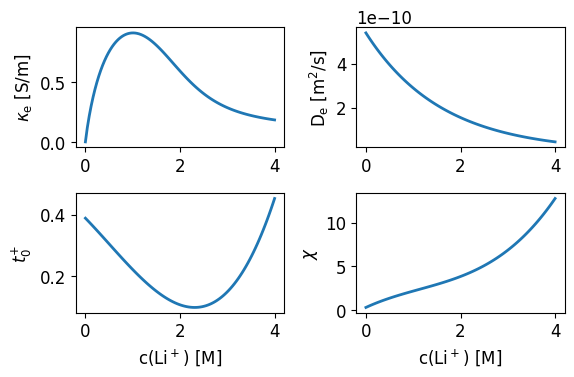

In [23]:
# plot Landesfeind2019 EC_EMC_3_7
N=100
c_e = np.linspace(0, 4000, N); T_0 = 298.15; lw=2
fig, axs = plt.subplots(2,2, figsize=(15/2.54,10/2.54),tight_layout=True) # 

axs[0,0].plot(
    c_e/1e3, 
    electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Constant(c_e,T_0), 
    lw=lw, ) 
axs[0,1].plot(
    c_e/1e3, 
    electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Constant(c_e,T_0), 
    lw=lw, ) 
axs[1,0].plot(
    c_e/1e3, 
    electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Constant(c_e,T_0), 
    lw=lw, ) 
axs[1,1].plot(
    c_e/1e3, 
    electrolyte_TDF_EC_EMC_3_7_Landesfeind2019_Constant(c_e,T_0), 
    lw=lw, ) 
for i in range(2):
    axs[1,i].set_xlabel(r"c(Li$^+$) [M]")

axs[0,0].set_ylabel("$\kappa_\mathrm{e}$ [S/m]")
axs[0,1].set_ylabel("D$_\mathrm{e}$ [m$^\mathrm{2}$/s]") # 
axs[1,0].set_ylabel("$\mathit{t}_\mathrm{0}^\mathrm{+}$")
axs[1,1].set_ylabel("$\chi$")
plt.savefig(
    target_folder + f"/Landesfeind2019_EC_EMC_3_7.png", dpi=800)
plt.savefig(
    target_folder + f"/Landesfeind2019_EC_EMC_3_7.svg")

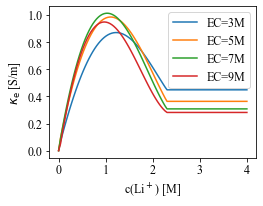

In [27]:
# electrolyte_conductivity_Andrew2022_poly4
def electrolyte_conductivity_Andrew2022_poly4(x1,y1, T):# x:Li+,y:ec
    p00 =      0.9608 # (0.9188, 1.003)
    p10 =      0.1502 # (0.09883, 0.2015)
    p01 =       0.173 # (0.1481, 0.1979)
    p20 =     -0.3934 # (-0.4666, -0.3202)
    p11 =     -0.1179 # (-0.1627, -0.07308)
    p02 =     -0.1472 # (-0.1767, -0.1176)
    p30 =     0.04244 # (0.01066, 0.07422)
    p21 =     -0.1197 # (-0.1423, -0.09704)
    p12 =   -0.003226 # (-0.02331, 0.01686)
    p40 =     0.01664 # (-0.01452, 0.0478)
    p31 =     0.05145 # (0.02312, 0.07978)
    p22 =     0.05983 # (0.0346, 0.08506)
    x1 = (x1<2300)*x1 + (x1>=2300)*2300
    x= (x1-971.4 )/733.1
    y= (y1-4737) / 3439
    kai  = (
        (x1 > 0 )  * (
        p00 + p10*x + p01*y + p20*x*x + p11*x*y + p02*y*y + p30*x*x*x + p21*x*x*y 
        + p12*x*y*y + p40*x*x*x*x + p31*x*x*x*y + p22*x*x*y*y
        )
        + (x1 <= 0 ) * 0 )
    kai_final = (kai>0) * kai + (kai<0) * 0
    return kai_final

fig, axs = plt.subplots(figsize=(9/2.54,7/2.54),layout='constrained')

c_e = np.linspace(0, 4000, N); T_0 = 25
#kai = electrolyte_conductivity_Andrew2022_poly4(c_e,3000,293.75)
#plt.plot(c_e,electrolyte_conductivity_Andrew2022_poly4(c_e,0,293.75),label="EC=0M")
#plt.plot(c_e,electrolyte_conductivity_Andrew2022_poly4(c_e,2000,T_0),label="EC=2M")
plt.plot(c_e/1e3,electrolyte_conductivity_Andrew2022_poly4(c_e,3000,T_0),label="EC=3M")
plt.plot(c_e/1e3,electrolyte_conductivity_Andrew2022_poly4(c_e,5000,T_0),label="EC=5M")
plt.plot(c_e/1e3,electrolyte_conductivity_Andrew2022_poly4(c_e,7000,T_0),label="EC=7M")
plt.plot(c_e/1e3,electrolyte_conductivity_Andrew2022_poly4(c_e,9000,T_0),label="EC=9M")
#plt.plot(c_e,electrolyte_conductivity_Andrew2022_poly4(c_e,10000,T_0),label="EC=10M")
plt.legend()
axs.set_xlabel(r"c(Li$^+$) [M]")
axs.set_ylabel("$\kappa_\mathrm{e}$ [S/m]")
plt.savefig(BasicPath +  Target+ 
    f"electrolyte_conductivity_Andrew2022_poly4.png", dpi=1000)
plt.savefig(BasicPath +  Target+ 
    f"electrolyte_conductivity_Andrew2022_poly4.svg")  

In [65]:
# Nyman
# Define electrolyte diffusivity and conductivity
def electrolyte_diffusivity_Nyman2008(c_e, T):
    D_c_e = 8.794e-11 * (c_e / 1000) ** 2 - 3.972e-10 * (c_e / 1000) + 4.862e-10
    return D_c_e    
def electrolyte_conductivity_Nyman2008(c_e, T):
    sigma_e = (0.1297 * (c_e / 1000) ** 3 - 2.51 * (c_e / 1000) ** 1.5 + 3.329 * (c_e / 1000))
    return sigma_e

def electrolyte_diffusivity_Nyman2008_con(c_e, T):
    c_e = (c_e <= 2200)*c_e + (c_e > 2200)*2200 
    D_c_e = 8.794e-11 * (c_e / 1000) ** 2 - 3.972e-10 * (c_e / 1000) + 4.862e-10
    return D_c_e    
def electrolyte_conductivity_Nyman2008_con(c_e, T):
    c_e = (c_e <= 2200)*c_e + (c_e > 2200)*2200
    sigma_e = (0.1297 * (c_e / 1000) ** 3 - 2.51 * (c_e / 1000) ** 1.5 + 3.329 * (c_e / 1000))
    return sigma_e
def electrolyte_conductivity_Valoen2005(c_e, T):   # valid concentration: 0~4000 mol/m3
    sigma_e = 0.1 * (-10.5 + 0.668*(1e-3*c_e) + 0.494*(1e-6*c_e**2) + 0.074*T - 0.0178*(1e-3*c_e)*T - 8.86e-4*(1e-6*c_e**2)*T - 6.96e-5*T**2 + 2.8E-5*(1E-3*c_e)*T**2 ) **2 * (1e-3*c_e)
    return sigma_e
def electrolyte_diffusivity_Valoen2005(c_e, T):
    D_c_e = 1e-4 * 10**(-4.43 - 54/(T - 229 - 0.005*c_e) - 2.2e-4 * c_e   )
    return D_c_e

def electrolyte_conductivity_Ecker2015(c_e, T):
    # mol/m^3 to mol/l
    cm = 1e-3 * c_e
    # value at T = 296K
    sigma_e_296 = 0.2667 * cm ** 3 - 1.2983 * cm ** 2 + 1.7919 * cm + 0.1726
    # Add temperature dependence
    E_k_e = 1.71e4
    C = 296 * exp(E_k_e / (constants.R * 296))
    sigma_e = C * sigma_e_296 * exp(-E_k_e / (constants.R * T)) / T
    return sigma_e.value
def electrolyte_diffusivity_Ecker2015(c_e, T):
    # mol/m^3 to mol/l
    cm = 1e-3 * c_e
    # value at T = 296K
    sigma_e_296 = 0.2667 * cm ** 3 - 1.2983 * cm ** 2 + 1.7919 * cm + 0.1726
    # add temperature dependence
    E_k_e = 1.71e4
    C = 296 * exp(E_k_e / (constants.R * 296))
    sigma_e = C * sigma_e_296 * exp(-E_k_e / (constants.R * T)) / T
    D_c_e = (constants.k_b / (constants.F * constants.q_e)) * sigma_e * T / c_e
    return D_c_e.value

def electrolyte_conductivity_Ding2001(c_e, c_EC,  T):
    # c_e is lithium ion concentration in electrolyte in mol/m3, need to change to mol/kg
    # also be careful that T here is deg, while others are K
    rho_electrolyte = 1300 # in kg/m3
    c_e_kg = c_e / rho_electrolyte     # in mol/kg 
    M_LiPF6 = 151.905/1000  # kg/mol
    M_EC = 88.062/1000  # kg/mol
    M_EMC = 104.104/1000 # kg/mol
    x_EC = 1 / (1+ ( rho_electrolyte - c_e*M_LiPF6 - c_EC*M_EC  )/M_EMC/c_EC   )
    kai = -3.37115 + 12.5608*c_e_kg - 7.89593*c_e_kg**2 + 3.51922*c_e_kg**3-1.15471*c_e_kg**4 +18.1863*x_EC - 6.22756*c_e_kg*x_EC - 13.6916*c_e_kg**2*x_EC +8.43904*c_e_kg**3*x_EC - 7.83732*x_EC**2 + 19.607*c_e_kg*x_EC**2  - 18.4529*c_e_kg**2*x_EC**2 -30.6369*x_EC**3 + 29.2*c_e_kg*x_EC**3 - 0.0429918*T + 0.180877*c_e_kg*T -0.0836202*c_e_kg**2*T + 0.0230098*c_e_kg**3*T + 0.195946*T*x_EC +0.0676686*c_e_kg*x_EC*T - 0.14134*c_e_kg**2*x_EC*T + 0.147429*x_EC**2*T  +0.173059*c_e_kg*x_EC**2*T - 0.51634*x_EC**3*T - 0.000223097*T**2 +0.000111233*c_e_kg*T**2 + 0.0000495286*c_e_kg**2*T**2  +0.000952777*x_EC*T**2 + 0.00117334 *c_e_kg*x_EC*T**2-0.000619157*x_EC**2*T**2 - 3.46897E-7*T**3 - 2.75041E-6*c_e_kg*T**3 -5.57653E-6*x_EC*T**3 
    return kai 

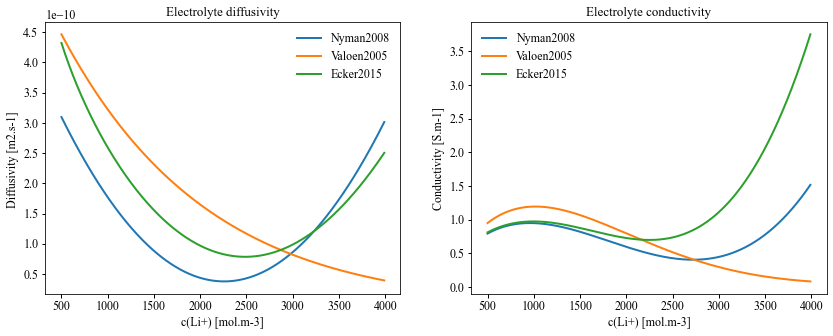

In [66]:
# Plot other elely properties
ce = np.arange(500,4000.0,10.0); T = np.full(ce.shape,298.15) ; c_EC = np.full(ce.shape,4540.0)  # standard T is 273.15; 25=298.15;     paper is 0.4 to 3.4 M experimentally; and 10 to 4000 curve fit
# ce = 1200.3; T = 298.15; # T = np.full(ce.shape,298.15) 
# T = np.full(np.size(ce),298.15) 
sigma_e_Nyman2008 =[]; D_c_e_Nyman2008 = []; 
sigma_e_Nyman2008_con =[]; D_c_e_Nyman2008_con = [];
sigma_e_Valoen2005 =[]; D_c_e_Valoen2005 = []; 
sigma_e_Ecker2015 =[]; D_c_e_Ecker2015 = []; 
sigma_e_Ding2001 =[];  
# sigma_e = np.full(ce.shape,0.0); D_c_e  = np.full(ce.shape,0.0);  #  
for ce_i in ce:
    # print(type(i))
    # print(ce[i])       
    # print(type(electrolyte_conductivity_Valoen2005(ce[i], T[i])))
    # print(dir(electrolyte_conductivity_Valoen2005(ce[i], T[i])))
    # print(electrolyte_conductivity_Valoen2005(ce[i], T[i]).data)
    # print(sigma_e[i])      
    sigma_e_Nyman2008.append(   electrolyte_conductivity_Nyman2008(ce_i, 298.15)  ) 
    D_c_e_Nyman2008.append  (   electrolyte_diffusivity_Nyman2008 (ce_i, 298.15)    )
    sigma_e_Nyman2008_con.append(   electrolyte_conductivity_Nyman2008_con(ce_i, 298.15)  ) 
    D_c_e_Nyman2008_con.append  (   electrolyte_diffusivity_Nyman2008_con (ce_i, 298.15)    )
    sigma_e_Valoen2005.append(   electrolyte_conductivity_Valoen2005(ce_i, 298.15)  ) 
    D_c_e_Valoen2005.append  (   electrolyte_diffusivity_Valoen2005 (ce_i, 298.15)    )
    sigma_e_Ecker2015.append(   electrolyte_conductivity_Ecker2015(ce_i, 298.15)  ) 
    D_c_e_Ecker2015.append  (   electrolyte_diffusivity_Ecker2015(ce_i, 298.15)    )
    sigma_e_Ding2001.append(   electrolyte_conductivity_Ding2001(ce_i,4340, 298.15)  ) 


lw = 2;
fig, axs = plt.subplots(1,2, figsize=(14,5))
axs[0].plot(list(ce), D_c_e_Nyman2008, lw=2, label='Nyman2008') 
axs[0].plot(list(ce), D_c_e_Valoen2005, lw=2, label='Valoen2005') 
axs[0].plot(list(ce), D_c_e_Ecker2015 , lw=2, label='Ecker2015') 
axs[0].set_xlabel("c(Li+) [mol.m-3]", fontdict={'family':'Times New Roman','size':fs})
axs[0].set_ylabel("Diffusivity [m2.s-1] ", fontdict={'family':'Times New Roman','size':fs})
labels = axs[0].get_xticklabels() + axs[0].get_yticklabels(); [label.set_fontname('Times New Roman') for label in labels]
axs[0].tick_params(labelcolor='k', labelsize=fs, width=1) ; del labels;
axs[0].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)
axs[0].set_title("Electrolyte diffusivity",   fontdict={'family':'Times New Roman','size':fs+1})

axs[1].plot(list(ce), sigma_e_Nyman2008, lw=2, label='Nyman2008') 
axs[1].plot(list(ce), sigma_e_Valoen2005, lw=2, label='Valoen2005') 
axs[1].plot(list(ce), sigma_e_Ecker2015 , lw=2, label='Ecker2015')  
# axs[1].plot(list(ce), sigma_e_Ding2001 , lw=2, label='Ding2001')
axs[1].set_xlabel("c(Li+) [mol.m-3]", fontdict={'family':'Times New Roman','size':fs})
axs[1].set_ylabel("Conductivity [S.m-1]", fontdict={'family':'Times New Roman','size':fs})
labels = axs[1].get_xticklabels() + axs[1].get_yticklabels(); [label.set_fontname('Times New Roman') for label in labels]
axs[1].tick_params(labelcolor='k', labelsize=fs, width=1) ; del labels;
axs[1].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)
axs[1].set_title("Electrolyte conductivity",   fontdict={'family':'Times New Roman','size':fs+1})


plt.savefig(BasicPath + Target+"Valoen Ecker Nyman Electrolyte conductivity and diffusivity.png", dpi=600)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


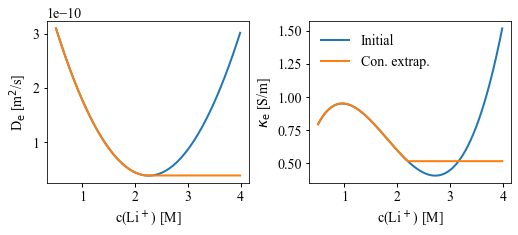

In [67]:
# plot for paper 2 (double transport):
fs = 14
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
lw = 2;
fig, axs = plt.subplots(1,2, figsize=(18/2.54,8/2.54),layout='constrained')
axs[0].plot(list(ce/1E3), D_c_e_Nyman2008, lw=lw, ) 
axs[0].plot(list(ce/1E3), D_c_e_Nyman2008_con, lw=lw, ) 

axs[0].set_xlabel(r"c(Li$^+$) [M]")
axs[0].set_ylabel("D$_\mathrm{e}$ [m$^\mathrm{2}$/s]")
labels = axs[0].get_xticklabels() + axs[0].get_yticklabels(); 
[label.set_fontname('Times New Roman') for label in labels]
axs[0].tick_params(labelcolor='k', labelsize=fs, width=1) ; del labels;
axs[0].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)
#axs[0].set_title("Electrolyte diffusivity",   fontdict={'family':'Times New Roman','size':fs+1})

axs[1].plot(list(ce/1E3), sigma_e_Nyman2008, lw=2,label='Initial' ) 
axs[1].plot(list(ce/1E3), sigma_e_Nyman2008_con, lw=2, label='Con. extrap.') 

axs[1].set_xlabel(r"c(Li$^+$) [M]")
axs[1].set_ylabel("$\kappa_\mathrm{e}$ [S/m]")
axs[1].tick_params(labelcolor='k', labelsize=fs, width=1) ;
axs[1].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)
#axs[1].set_title("Electrolyte conductivity",   fontdict={'family':'Times New Roman','size':fs+1})
plt.savefig(BasicPath +  Target+ 
    f"Nyman initial and constant extrapolation.png", dpi=1000)
plt.savefig(BasicPath +  Target+ 
    f"Nyman initial and constant extrapolation.svg")  


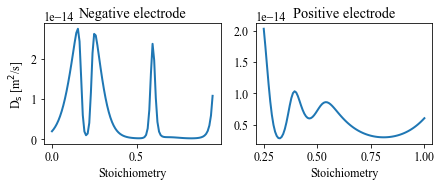

In [50]:
# plot electrode diffusivity
fs=12; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
font = {'family' : 'Times New Roman',
        'size'   : fs}
mpl.rc('font', **font)

def nmc_LGM50_diffusivity_ORegan2022(sto, T):
    a1 = -0.9231
    a2 = -0.4066
    a3 = -0.993
    b1 = 0.3216
    b2 = 0.4532
    b3 = 0.8098
    c0 = -13.96
    c1 = 0.002534
    c2 = 0.003926
    c3 = 0.09924
    d = 1449

    D_ref = (
        10
        ** (
            c0
            + a1 * np.exp(-((sto - b1) ** 2) / c1)
            + a2 * np.exp(-((sto - b2) ** 2) / c2)
            + a3 * np.exp(-((sto - b3) ** 2) / c3)
        )
        * 2.7  # correcting factor (see O'Regan et al 2021)
    )

    E_D_s = d * pybamm.constants.R.value
    arrhenius = np.exp(E_D_s / pybamm.constants.R.value * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius
def graphite_LGM50_diffusivity_ORegan2022(sto, T):
    a0 = 11.17
    a1 = -1.553
    a2 = -6.136
    a3 = -9.725
    a4 = 1.85
    b1 = 0.2031
    b2 = 0.5375
    b3 = 0.9144
    b4 = 0.5953
    c0 = -15.11
    c1 = 0.0006091
    c2 = 0.06438
    c3 = 0.0578
    c4 = 0.001356
    d = 2092

    D_ref = (
        10
        ** (
            a0 * sto
            + c0
            + a1 * np.exp(-((sto - b1) ** 2) / c1)
            + a2 * np.exp(-((sto - b2) ** 2) / c2)
            + a3 * np.exp(-((sto - b3) ** 2) / c3)
            + a4 * np.exp(-((sto - b4) ** 2) / c4)
        )
        * 3.0321  # correcting factor (see O'Regan et al 2021)
    )

    E_D_s = d * pybamm.constants.R.value
    arrhenius = np.exp(E_D_s / pybamm.constants.R.value * (1 / 298.15 - 1 / T))

    return D_ref * arrhenius

N=100
sto_neg = np.linspace(0, 0.95, N); T_0 = 298.15; lw=2
sto_pos = np.linspace(0.25, 1, N);
fig, axs = plt.subplots(1,2, figsize=(16/2.54,7/2.54),tight_layout=True) # 

axs[0].plot(
    sto_neg, 
    graphite_LGM50_diffusivity_ORegan2022(sto_neg,T_0), 
    lw=lw, ) 
axs[1].plot(
    sto_pos, 
    nmc_LGM50_diffusivity_ORegan2022(sto_pos,T_0), 
    lw=lw, ) 
for i in range(2):
    axs[i].set_xlabel(r"Stoichiometry")
axs[0].set_ylabel("D$_\mathrm{s}$ [m$^\mathrm{2}$/s]") # 
axs[0].set_title("Negative electrode") # 
axs[1].set_title("Positive electrode") # 
plt.savefig(BasicPath +  Target+ 
    f"Electrode diffusivity.png", dpi=1000)
plt.savefig(BasicPath +  Target+ 
    f"Electrode diffusivity.svg")  # """

' plt.savefig(BasicPath +  Target+ \n    f"Electrode OCP.png", dpi=1000)\nplt.savefig(BasicPath +  Target+ \n    f"Electrode OCP.svg")   '

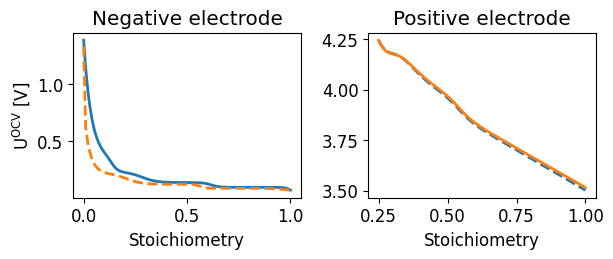

In [25]:
# plot electrode OCP:
def graphite_LGM50_delithiation_ocp_OKane2023(sto):
    u_eq = (
        1.051 * np.exp(-26.76 * sto)
        + 0.1916
        - 0.05598 * np.tanh(35.62 * (sto - 0.1356))
        - 0.04483 * np.tanh(14.64 * (sto - 0.2861))
        - 0.02097 * np.tanh(26.28 * (sto - 0.6183))
        - 0.02398 * np.tanh(38.1 * (sto - 1))
    )
    return u_eq
def graphite_LGM50_lithiation_ocp_OKane2023(sto):
    u_eq = (
        0.5476 * np.exp(-422.4 * sto)
        + 0.5705 * np.exp(-36.89 * sto)
        + 0.1336
        - 0.04758 * np.tanh(13.88 * (sto - 0.2101))
        - 0.01761 * np.tanh(36.2 * (sto - 0.5639))
        - 0.0169 * np.tanh(11.42 * (sto - 1))
    )
    return u_eq
def nmc_LGM50_lithiation_ocp_OKane2023(sto):
    U = (
        -0.7983 * sto
        + 4.513
        - 0.03269 * np.tanh(19.83 * (sto - 0.5424))
        - 18.23 * np.tanh(14.33 * (sto - 0.2771))
        + 18.05 * np.tanh(14.46 * (sto - 0.2776))
    )
    return U
def nmc_LGM50_delithiation_ocp_OKane2023(sto):
    U = (
        -0.7836 * sto
        + 4.513
        - 0.03432 * np.tanh(19.83 * (sto - 0.5424))
        - 19.35 * np.tanh(14.33 * (sto - 0.2771))
        + 19.17 * np.tanh(14.45 * (sto - 0.2776))
    )
    return U
#

N=100
sto_neg = np.linspace(0, 1, N); T_0 = 298.15; lw=2
sto_pos = np.linspace(0.25, 1, N);
fig, axs = plt.subplots(1,2, figsize=(16/2.54,7/2.54),tight_layout=True) # 

axs[0].plot(
    sto_neg, 
    graphite_LGM50_delithiation_ocp_OKane2023(sto_neg),
    lw=lw,  ls="-",  label="Delithiation") 
axs[0].plot(
    sto_neg, 
    graphite_LGM50_lithiation_ocp_OKane2023(sto_neg),
    lw=lw,  ls="--",  label="Lithiation") 
axs[1].plot(
    sto_pos, 
    nmc_LGM50_lithiation_ocp_OKane2023(sto_pos), 
    lw=lw,ls="--",  label="Lithiation" ) 
axs[1].plot(
    sto_pos, 
    nmc_LGM50_delithiation_ocp_OKane2023(sto_pos), 
    lw=lw,ls="-",  label="Delithiation" ) 

for i in range(2):
    axs[i].set_xlabel(r"Stoichiometry")
axs[0].set_ylabel("U$^\mathrm{OCV}$ [V]") # 
axs[0].set_title("Negative electrode") # 
axs[1].set_title("Positive electrode") # 
""" plt.savefig(BasicPath +  Target+ 
    f"Electrode OCP.png", dpi=1000)
plt.savefig(BasicPath +  Target+ 
    f"Electrode OCP.svg")   """

' plt.savefig(BasicPath +  Target+ \n    f"Electrode dU_dt.png", dpi=1000)\nplt.savefig(BasicPath +  Target+ \n    f"Electrode dU_dt.svg")   '

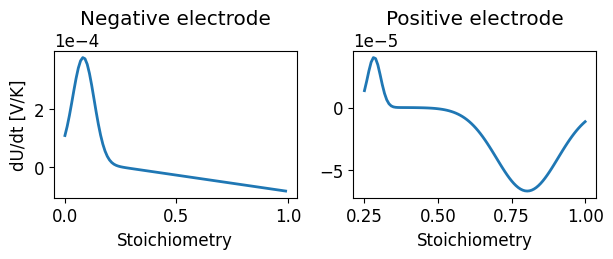

In [28]:
# dU/dt
def nmc_LGM50_entropic_change_ORegan2022(sto, c_s_max):
    a1 = 0.04006
    a2 = -0.06656
    b1 = 0.2828
    b2 = 0.8032
    c1 = 0.0009855
    c2 = 0.02179

    dUdT = (
        a1 * np.exp(-((sto - b1) ** 2) / c1)
        + a2 * np.exp(-((sto - b2) ** 2) / c2)
    ) / 1000
    # fit in mV / K
    return dUdT
def graphite_LGM50_entropic_change_ORegan2022(sto, c_s_max):
    a0 = -0.1112
    a1 = -0.09002 * 0  # fixed fit (see discussion O'Regan et al 2021)
    a2 = 0.3561
    b1 = 0.4955
    b2 = 0.08309
    c0 = 0.02914
    c1 = 0.1122
    c2 = 0.004616
    d1 = 63.9

    dUdT = (
        a0 * sto
        + c0
        + a2 * np.exp(-((sto - b2) ** 2) / c2)
        + a1
        * (np.tanh(d1 * (sto - (b1 - c1))) - np.tanh(d1 * (sto - (b1 + c1))))
    ) / 1000  # fit in mV / K

    return dUdT
#
N=100
sto_neg = np.linspace(0, 0.99, N); T_0 = 298.15; lw=2
sto_pos = np.linspace(0.25, 1, N);
fig, axs = plt.subplots(1,2, figsize=(16/2.54,7/2.54),tight_layout=True) # 

axs[0].plot(
    sto_neg, 
    graphite_LGM50_entropic_change_ORegan2022(sto_neg, 1), 
    lw=lw, ) 
axs[1].plot(
    sto_pos, 
    nmc_LGM50_entropic_change_ORegan2022(sto_pos, 1), 
    lw=lw, ) 
for i in range(2):
    axs[i].set_xlabel(r"Stoichiometry")
    axs[i].ticklabel_format( 
        axis='y', style='sci',
        scilimits=[-1e-3,1e-3], useOffset=None, 
        useLocale=None, useMathText=None)
axs[0].set_ylabel("dU/dt [V/K]") # 
axs[0].set_title("Negative electrode") # 
axs[1].set_title("Positive electrode") # 
""" plt.savefig(BasicPath +  Target+ 
    f"Electrode dU_dt.png", dpi=1000)
plt.savefig(BasicPath +  Target+ 
    f"Electrode dU_dt.svg")   """

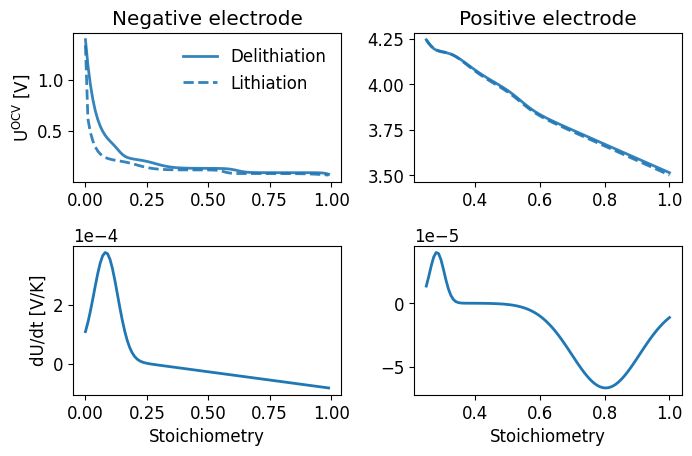

In [33]:
# combine U and dU/dT together:
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.7], # like green  
    [214/255, 39/255, 40/255,  0.7], # like red
    [255/255, 127/255, 14/255, 0.7],]# like orange

fig, axs = plt.subplots(2,2, figsize=(18/2.54,12/2.54),tight_layout=True) # 
axs[0,0].plot(
    sto_neg, 
    graphite_LGM50_delithiation_ocp_OKane2023(sto_neg), color = Default_Colors_Alpha[0],
    lw=lw,  ls="-",  label="Delithiation") 
axs[0,0].plot(
    sto_neg, 
    graphite_LGM50_lithiation_ocp_OKane2023(sto_neg), color = Default_Colors_Alpha[0],
    lw=lw,  ls="--",  label="Lithiation") 
axs[0,1].plot(
    sto_pos, 
    nmc_LGM50_lithiation_ocp_OKane2023(sto_pos),  color = Default_Colors_Alpha[0],
    lw=lw,ls="--",  label="Lithiation" ) 
axs[0,1].plot(
    sto_pos, 
    nmc_LGM50_delithiation_ocp_OKane2023(sto_pos),  color = Default_Colors_Alpha[0],
    lw=lw,ls="-",  label="Delithiation" ) 
# 
axs[1,0].plot(
    sto_neg, 
    graphite_LGM50_entropic_change_ORegan2022(sto_neg, 1), 
    lw=lw, ) 
axs[1,1].plot(
    sto_pos, 
    nmc_LGM50_entropic_change_ORegan2022(sto_pos, 1), 
    lw=lw, ) 
for i in range(2):
    axs[1,i].set_xlabel(r"Stoichiometry")
    axs[1,i].ticklabel_format( 
        axis='y', style='sci',
        scilimits=[-1e-3,1e-3], useOffset=None, 
        useLocale=None, useMathText=None)
axs[1,0].set_ylabel("dU/dt [V/K]") # 
axs[0,0].set_ylabel("U$^\mathrm{OCV}$ [V]") # 
axs[0,0].set_title("Negative electrode") # 
axs[0,1].set_title("Positive electrode") # 
axs[0,0].legend(loc='best',frameon=False)
plt.savefig(
    target_folder + f"/OKane2023_OCP_dUdT.png", dpi=800)
plt.savefig(
    target_folder + f"/OKane2023_OCP_dUdT.svg")

In [34]:
#graphite_LGM50_diffusivity_ORegan2022(0.1,T_0)
pybamm.constants.R.value

8.314462618